# Library Requirement

In [39]:
# for data preparation
import pandas as pd
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# for clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Data Preparation

In [2]:
df = pd.read_csv('jumlah_penduduk_kota_bandung_berdasarkan_jenis_pendidikan_2(1).csv')
df

,id,kode_provinsi,nama_provinsi,bps_kode_kabupaten_kota,bps_nama_kabupaten_kota,bps_kode_kecamatan,bps_nama_kecamatan,bps_kode_desa_kelurahan,bps_desa_kelurahan,kemendagri_kode_kecamatan,kemendagri_nama_kecamatan,kemendagri_kode_desa_kelurahan,kemendagri_nama_desa_kelurahan,jenis_pendidikan,jumlah_penduduk,satuan,semester,tahun
0,1,32,JAWA BARAT,3273,KOTA BANDUNG,3273250,SUKASARI,3273250002,SUKARASA,32.73.01,SUKASARI,32.73.01.1001,SUKARASA,TIDAK/BELUM SEKOLAH,1955,ORANG,1,2017
1,2,32,JAWA BARAT,3273,KOTA BANDUNG,3273250,SUKASARI,3273250002,SUKARASA,32.73.01,SUKASARI,32.73.01.1001,SUKARASA,BELUM TAMAT SD,1109,ORANG,1,2017
2,3,32,JAWA BARAT,3273,KOTA BANDUNG,3273250,SUKASARI,3273250002,SUKARASA,32.73.01,SUKASARI,32.73.01.1001,SUKARASA,TAMAT SD/SEDERAJAT,2132,ORANG,1,2017
3,4,32,JAWA BARAT,3273,KOTA BANDUNG,3273250,SUKASARI,3273250002,SUKARASA,32.73.01,SUKASARI,32.73.01.1001,SUKARASA,SLTP/SEDERAJAT,1549,ORANG,1,2017
4,5,32,JAWA BARAT,3273,KOTA BANDUNG,3273250,SUKASARI,3273250002,SUKARASA,32.73.01,SUKASARI,32.73.01.1001,SUKARASA,SLTA/SEDERAJAT,3374,ORANG,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25665,25666,32,JAWA BARAT,3273,KOTA BANDUNG,3273100,RANCASARI,3273100006,MEKARJAYA,327323,RANCASARI,32.73.23.1004,MEKARMULYA,DIPLOMA I/II,255,ORANG,1,2025
25666,25667,32,JAWA BARAT,3273,KOTA BANDUNG,3273100,RANCASARI,3273100006,MEKARJAYA,327323,RANCASARI,32.73.23.1004,MEKARMULYA,AKADEMI/DIPL.III/S.MUDA,1195,ORANG,1,2025
25667,25668,32,JAWA BARAT,3273,KOTA BANDUNG,3273100,RANCASARI,3273100006,MEKARJAYA,327323,RANCASARI,32.73.23.1004,MEKARMULYA,DIPLOMA IV/STRATA I,3292,ORANG,1,2025
25668,25669,32,JAWA BARAT,3273,KOTA BANDUNG,3273100,RANCASARI,3273100006,MEKARJAYA,327323,RANCASARI,32.73.23.1004,MEKARMULYA,STRATA-II,380,ORANG,1,2025


In [4]:
df['jenis_pendidikan'].value_counts()

jenis_pendidikan
SLTP/SEDERAJAT              2567
TAMAT SD/SEDERAJAT          2567
DIPLOMA IV/STRATA I         2567
SLTA/SEDERAJAT              2567
TIDAK/BELUM SEKOLAH         2265
BELUM TAMAT SD              2265
DIPLOMA I & II              2265
DIPLOMA III                 2265
STRATA 2                    2265
STRATA 3                    2265
TIDAK/BLM SEKOLAH            302
BELUM TAMAT SD/SEDERAJAT     302
DIPLOMA I/II                 302
AKADEMI/DIPL.III/S.MUDA      302
STRATA-II                    302
STRATA-III                   302
Name: count, dtype: int64

In [5]:
df['jenis_pendidikan'] = df['jenis_pendidikan'].replace({
    'TIDAK/BLM SEKOLAH': 'TIDAK/BELUM SEKOLAH',
    'BELUM TAMAT SD': 'BELUM TAMAT SD/SEDERAJAT',
    'DIPLOMA I/II': 'DIPLOMA I & II',
    'AKADEMI/DIPL.III/S.MUDA': 'DIPLOMA III',
    'STRATA-II': 'STRATA 2',
    'STRATA-III': 'STRATA 3'
})

In [6]:
df['jenis_pendidikan'].value_counts()

jenis_pendidikan
TIDAK/BELUM SEKOLAH         2567
BELUM TAMAT SD/SEDERAJAT    2567
TAMAT SD/SEDERAJAT          2567
SLTP/SEDERAJAT              2567
SLTA/SEDERAJAT              2567
DIPLOMA I & II              2567
DIPLOMA III                 2567
DIPLOMA IV/STRATA I         2567
STRATA 2                    2567
STRATA 3                    2567
Name: count, dtype: int64

In [7]:
df.columns

Index(['id', 'kode_provinsi', 'nama_provinsi', 'bps_kode_kabupaten_kota',
       'bps_nama_kabupaten_kota', 'bps_kode_kecamatan', 'bps_nama_kecamatan',
       'bps_kode_desa_kelurahan', 'bps_desa_kelurahan',
       'kemendagri_kode_kecamatan', 'kemendagri_nama_kecamatan',
       'kemendagri_kode_desa_kelurahan', 'kemendagri_nama_desa_kelurahan',
       'jenis_pendidikan', 'jumlah_penduduk', 'satuan', 'semester', 'tahun'],
      dtype='object')

In [12]:
# menampilkan dataset (yang sudah di-aggregat) dalam bentuk pivot > agar lebih nyaman dilihat
df_pivot = df.pivot_table(
    index="bps_desa_kelurahan",
    columns="jenis_pendidikan",
    values="jumlah_penduduk",
    aggfunc="sum",
    fill_value=0,
    # margins=True,             # <-- nambahin grand total
    # margins_name="Grand Total" # <-- nama baris/kolom total
)

df_pivot.columns = [f"total_{col}" for col in df_pivot.columns]
# Baru reset index
df_pivot = df_pivot.reset_index()
df_pivot

,bps_desa_kelurahan,total_BELUM TAMAT SD/SEDERAJAT,total_DIPLOMA I & II,total_DIPLOMA III,total_DIPLOMA IV/STRATA I,total_SLTA/SEDERAJAT,total_SLTP/SEDERAJAT,total_STRATA 2,total_STRATA 3,total_TAMAT SD/SEDERAJAT,total_TIDAK/BELUM SEKOLAH
0,ANCOL,16662,1922,11941,38559,62867,19733,4492,502,13465,27887
1,ANTAPANI KIDUL,32596,6977,29389,93787,124291,36590,14482,1636,24083,69387
2,ANTAPANI KULON,15760,2025,8492,28029,54203,22611,5269,675,18723,31467
3,ANTAPANI TENGAH,32180,6964,26609,76878,113624,37644,9244,1032,30036,70369
4,ANTAPANI WETAN,29452,3974,14638,47347,97397,38308,8302,776,29242,56345
...,...,...,...,...,...,...,...,...,...,...,...
146,SUKAWARNA,24670,2912,9198,26432,70456,30471,3907,515,34632,39836
147,TAMAN SARI,35172,4933,15628,36837,148836,45330,4413,829,34922,58312
148,TURANGGA,24642,3838,17234,66700,62802,21947,14461,2110,11809,33936
149,WARUNG MUNCANG,41436,2536,5672,13967,98651,63565,982,242,70132,64982


In [13]:
df_pivot.columns

Index(['bps_desa_kelurahan', 'total_BELUM TAMAT SD/SEDERAJAT',
       'total_DIPLOMA I & II', 'total_DIPLOMA III',
       'total_DIPLOMA IV/STRATA I', 'total_SLTA/SEDERAJAT',
       'total_SLTP/SEDERAJAT', 'total_STRATA 2', 'total_STRATA 3',
       'total_TAMAT SD/SEDERAJAT', 'total_TIDAK/BELUM SEKOLAH'],
      dtype='object')

In [14]:
# pendidikan rendah
df_pivot['pendidikan_rendah']= (
    df_pivot["total_TAMAT SD/SEDERAJAT"] +
    df_pivot["total_BELUM TAMAT SD/SEDERAJAT"] +
    df_pivot["total_TAMAT SD/SEDERAJAT"]
)

# pendidikan menengah
df_pivot["pendidikan_menengah"] = (
    df_pivot["total_SLTP/SEDERAJAT"] +
    df_pivot["total_SLTA/SEDERAJAT"]
)

# pendidikan tinggi
df_pivot["pendidikan_tinggi"] = (
    df_pivot["total_DIPLOMA I & II"] +
    df_pivot["total_DIPLOMA III"] +
    df_pivot["total_DIPLOMA IV/STRATA I"] +
    df_pivot["total_STRATA 2"] +
    df_pivot["total_STRATA 3"]
)

df_pivot.columns

Index(['bps_desa_kelurahan', 'total_BELUM TAMAT SD/SEDERAJAT',
       'total_DIPLOMA I & II', 'total_DIPLOMA III',
       'total_DIPLOMA IV/STRATA I', 'total_SLTA/SEDERAJAT',
       'total_SLTP/SEDERAJAT', 'total_STRATA 2', 'total_STRATA 3',
       'total_TAMAT SD/SEDERAJAT', 'total_TIDAK/BELUM SEKOLAH',
       'pendidikan_rendah', 'pendidikan_menengah', 'pendidikan_tinggi'],
      dtype='object')

In [15]:
# Total penduduk per kelurahan (berdasarkan pendidikan)
df_pivot["total_pendidikan"] = (
    df_pivot["pendidikan_rendah"] +
    df_pivot["pendidikan_menengah"] +
    df_pivot["pendidikan_tinggi"]
)

# Konversi ke persentase
df_pivot["rendah_pct"] = df_pivot["pendidikan_rendah"] / df_pivot["total_pendidikan"]
df_pivot["menengah_pct"] = df_pivot["pendidikan_menengah"] / df_pivot["total_pendidikan"]
df_pivot["tinggi_pct"] = df_pivot["pendidikan_tinggi"] / df_pivot["total_pendidikan"]

df_pivot.columns


Index(['bps_desa_kelurahan', 'total_BELUM TAMAT SD/SEDERAJAT',
       'total_DIPLOMA I & II', 'total_DIPLOMA III',
       'total_DIPLOMA IV/STRATA I', 'total_SLTA/SEDERAJAT',
       'total_SLTP/SEDERAJAT', 'total_STRATA 2', 'total_STRATA 3',
       'total_TAMAT SD/SEDERAJAT', 'total_TIDAK/BELUM SEKOLAH',
       'pendidikan_rendah', 'pendidikan_menengah', 'pendidikan_tinggi',
       'total_pendidikan', 'rendah_pct', 'menengah_pct', 'tinggi_pct'],
      dtype='object')

# EDA (Before Clustering)

## 1️⃣ DUA LINE PLOT

`Tujuan`: melihat variasi ekstrem pendidikan rendah & tinggi antar kelurahan

### 1️⃣ LINE PLOT TOP 10 – PENDIDIKAN RENDAH TERTINGGI

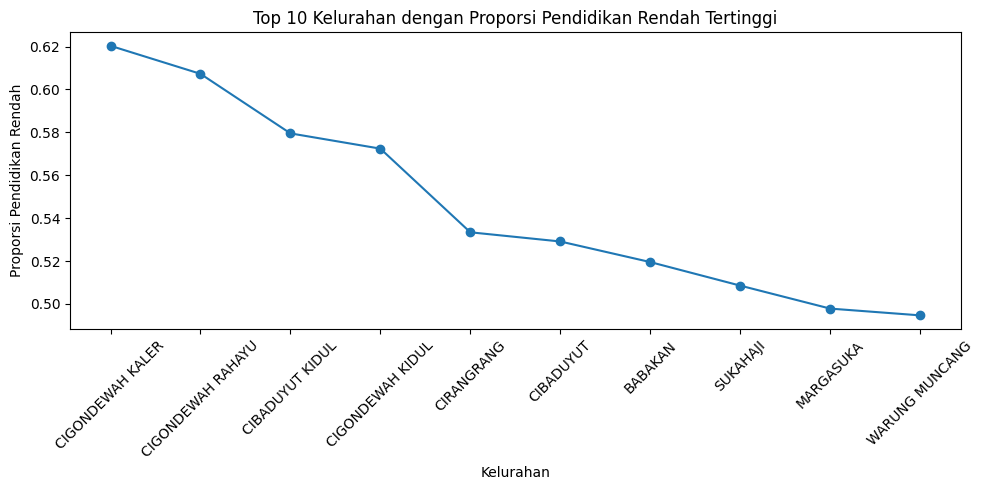

In [18]:
# Ambil Top 10 pendidikan rendah tertinggi
top10_rendah = df_pivot.sort_values(
    by="rendah_pct",
    ascending=False
).head(10)

plt.figure(figsize=(10,5))
plt.plot(top10_rendah["bps_desa_kelurahan"], top10_rendah["rendah_pct"], marker="o")
plt.xticks(rotation=45)
plt.title("Top 10 Kelurahan dengan Proporsi Pendidikan Rendah Tertinggi")
plt.xlabel("Kelurahan")
plt.ylabel("Proporsi Pendidikan Rendah")
plt.tight_layout()
plt.show()


`📌 Makna EDA:`
Menunjukkan kelurahan dengan ketimpangan pendidikan paling berat dari sisi bawah

### 2️⃣ LINE PLOT TOP 10 – PENDIDIKAN TINGGI TERTINGGI

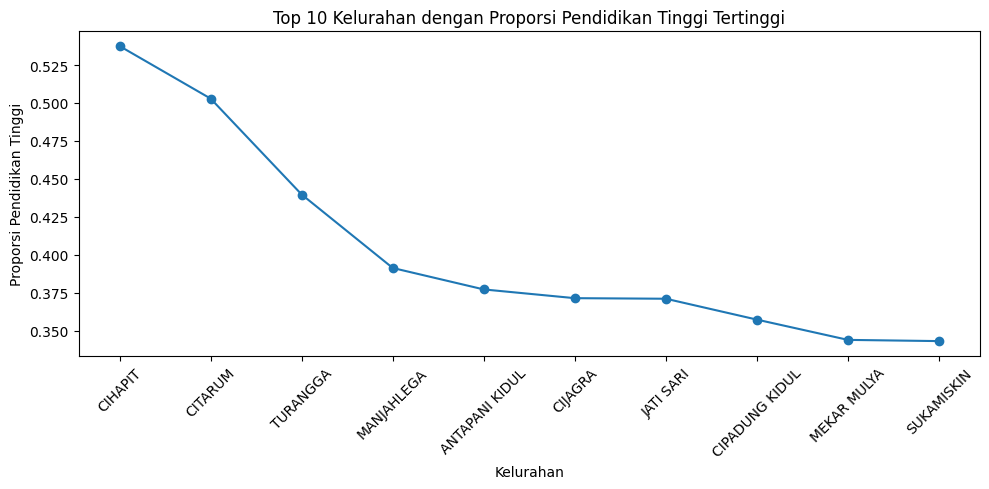

In [20]:
# Ambil Top 10 pendidikan tinggi tertinggi
top10_tinggi = df_pivot.sort_values(
    by="tinggi_pct",
    ascending=False
).head(10)

plt.figure(figsize=(10,5))
plt.plot(top10_tinggi["bps_desa_kelurahan"], top10_tinggi["tinggi_pct"], marker="o")
plt.xticks(rotation=45)
plt.title("Top 10 Kelurahan dengan Proporsi Pendidikan Tinggi Tertinggi")
plt.xlabel("Kelurahan")
plt.ylabel("Proporsi Pendidikan Tinggi")
plt.tight_layout()
plt.show()


`📌 Makna EDA:`
Menunjukkan kelurahan dengan ketimpangan paling rendah / paling maju secara pendidikan.

## 2️⃣ DUA BOX PLOT (RENDAH vs TINGGI)

Tujuan: melihat sebaran & outlier ketimpangan

C:\Users\qwerty\AppData\Local\Temp\ipykernel_948\3068845963.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


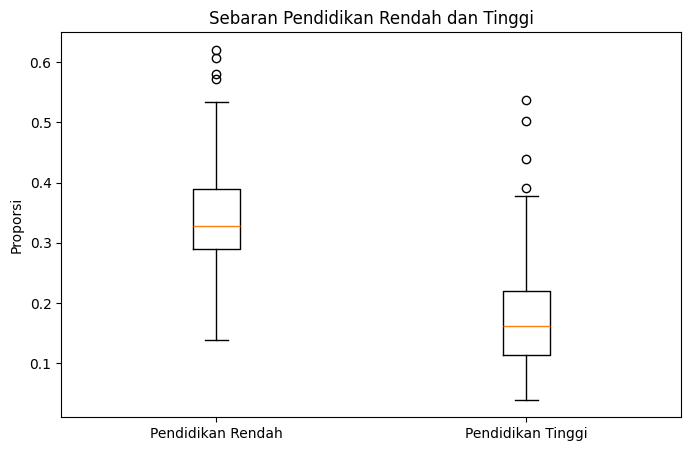

In [21]:
plt.figure(figsize=(8,5))
plt.boxplot(
    [df_pivot["rendah_pct"], df_pivot["tinggi_pct"]],
    labels=["Pendidikan Rendah", "Pendidikan Tinggi"]
)
plt.title("Sebaran Pendidikan Rendah dan Tinggi")
plt.ylabel("Proporsi")
plt.show()

### 3️⃣ DUA BOX PLOT (STRUKTUR PENDIDIKAN LENGKAP)

Tujuan: melihat posisi pendidikan menengah dalam ketimpangan

Box Plot 3 — Pendidikan Menengah

C:\Users\qwerty\AppData\Local\Temp\ipykernel_948\4237988957.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_pivot["menengah_pct"], labels=["Pendidikan Menengah"])


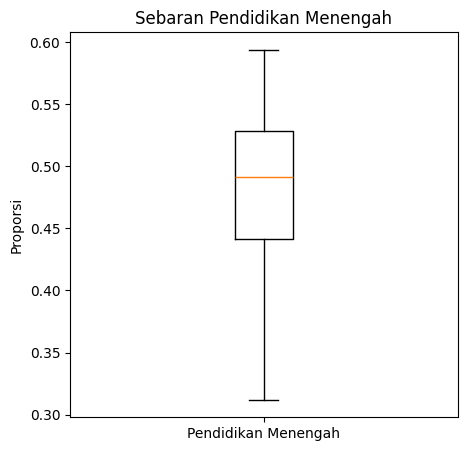

In [22]:
plt.figure(figsize=(5,5))
plt.boxplot(df_pivot["menengah_pct"], labels=["Pendidikan Menengah"])
plt.title("Sebaran Pendidikan Menengah")
plt.ylabel("Proporsi")
plt.show()

Box Plot 4 — Perbandingan Rendah–Menengah–Tinggi

C:\Users\qwerty\AppData\Local\Temp\ipykernel_948\3059683809.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


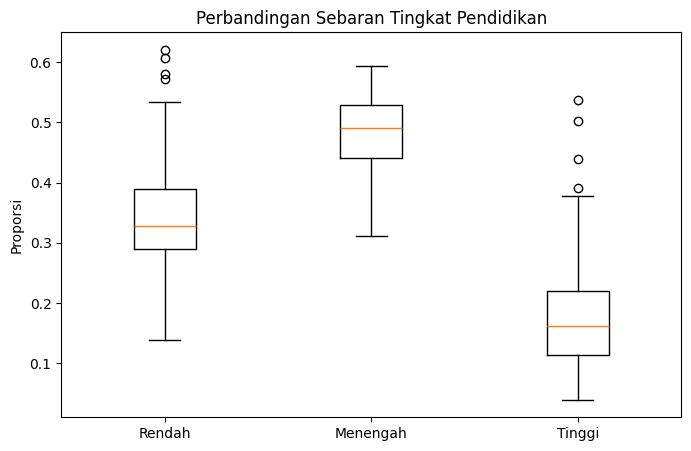

In [23]:
plt.figure(figsize=(8,5))
plt.boxplot(
    [df_pivot["rendah_pct"], df_pivot["menengah_pct"], df_pivot["tinggi_pct"]],
    labels=["Rendah", "Menengah", "Tinggi"]
)
plt.title("Perbandingan Sebaran Tingkat Pendidikan")
plt.ylabel("Proporsi")
plt.show()


## Scatter Plot

Tujuan: visualisasi langsung ketimpangan ekstrem

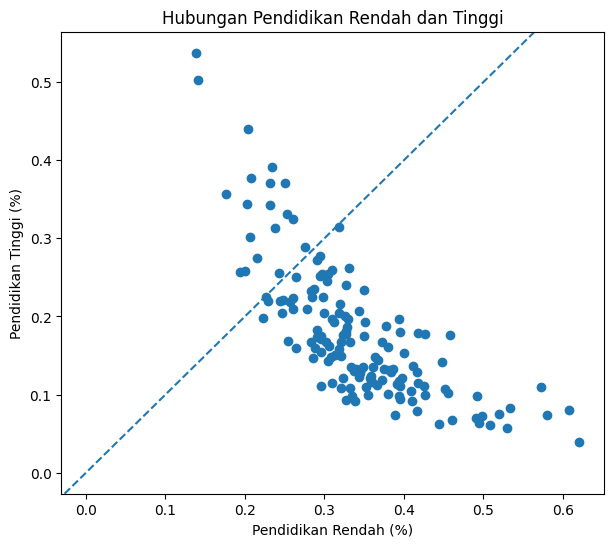

In [26]:
plt.figure(figsize=(7,6))
plt.scatter(df_pivot["rendah_pct"], df_pivot["tinggi_pct"])
plt.xlabel("Pendidikan Rendah (%)")
plt.ylabel("Pendidikan Tinggi (%)")
plt.title("Hubungan Pendidikan Rendah dan Tinggi")
plt.axline((0,0), slope=1, linestyle="--")
plt.show()


Berdasarkan hasil visualisasi scatter plot, terlihat adanya hubungan negatif yang kuat antara proporsi penduduk berpendidikan rendah dan tinggi antar kelurahan. Sebagian besar titik data berada jauh dari garis diagonal dan membentuk pola menurun, yang menunjukkan bahwa kelurahan dengan proporsi pendidikan rendah yang tinggi cenderung memiliki proporsi pendidikan tinggi yang rendah, dan sebaliknya. Pola ini mengindikasikan adanya ketimpangan pendidikan yang jelas antar kelurahan di Kota Bandung.

## Correlation Matrix

In [28]:
df_pivot.columns

Index(['bps_desa_kelurahan', 'total_BELUM TAMAT SD/SEDERAJAT',
       'total_DIPLOMA I & II', 'total_DIPLOMA III',
       'total_DIPLOMA IV/STRATA I', 'total_SLTA/SEDERAJAT',
       'total_SLTP/SEDERAJAT', 'total_STRATA 2', 'total_STRATA 3',
       'total_TAMAT SD/SEDERAJAT', 'total_TIDAK/BELUM SEKOLAH',
       'pendidikan_rendah', 'pendidikan_menengah', 'pendidikan_tinggi',
       'total_pendidikan', 'rendah_pct', 'menengah_pct', 'tinggi_pct'],
      dtype='object')

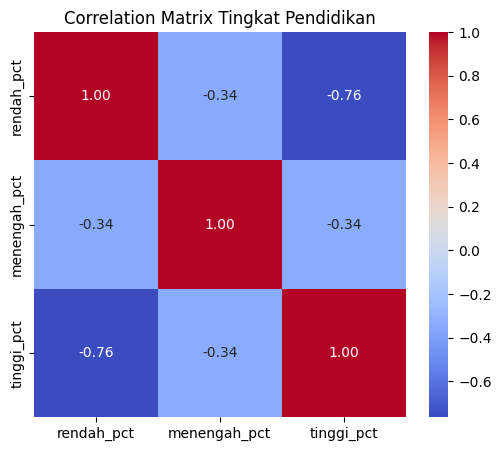

In [27]:
corr = df_pivot[["rendah_pct", "menengah_pct", "tinggi_pct"]].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Tingkat Pendidikan")
plt.show()


✅ Interpretasi Correlation Matrix

> Berdasarkan hasil correlation matrix, terdapat hubungan negatif yang kuat antara proporsi penduduk berpendidikan rendah dan tinggi dengan nilai korelasi sebesar -0,76. Hal ini menunjukkan bahwa kelurahan dengan proporsi pendidikan rendah yang tinggi cenderung memiliki proporsi pendidikan tinggi yang rendah, dan sebaliknya. Kondisi tersebut mengindikasikan adanya ketimpangan pendidikan yang nyata antar kelurahan di Kota Bandung.

> Sementara itu, hubungan antara pendidikan menengah dengan pendidikan rendah maupun tinggi menunjukkan korelasi negatif sedang (masing-masing sebesar -0,34). Hal ini mengindikasikan bahwa pendidikan menengah berperan sebagai kelompok transisi, yang tidak sepenuhnya mendominasi struktur pendidikan di suatu kelurahan, namun tetap berkaitan dengan pergeseran dari pendidikan rendah menuju pendidikan tinggi.

In [29]:
df_pivot.columns

Index(['bps_desa_kelurahan', 'total_BELUM TAMAT SD/SEDERAJAT',
       'total_DIPLOMA I & II', 'total_DIPLOMA III',
       'total_DIPLOMA IV/STRATA I', 'total_SLTA/SEDERAJAT',
       'total_SLTP/SEDERAJAT', 'total_STRATA 2', 'total_STRATA 3',
       'total_TAMAT SD/SEDERAJAT', 'total_TIDAK/BELUM SEKOLAH',
       'pendidikan_rendah', 'pendidikan_menengah', 'pendidikan_tinggi',
       'total_pendidikan', 'rendah_pct', 'menengah_pct', 'tinggi_pct'],
      dtype='object')

# Preprocessing

`🧠 Justifikasi`

Analisis _clustering_ dilakukan menggunakan variabel proporsi pendidikan rendah, menengah, dan tinggi.

Penggunaan variabel persentase bertujuan untuk menghilangkan pengaruh perbedaan jumlah penduduk antar kelurahan, sehingga klaster yang terbentuk merepresentasikan ketimpangan struktur pendidikan (bukan skala populasi).

## Pemilihan Fitur Untuk Clustering

🔎 Alasan Pemilihan 3 Fitur Untuk Clustering (`'rendah_pct', 'menengah_pct', 'tinggi_pct'`)

- Ketimpangan = perbedaan proporsi, bukan jumlah absolut

- Persentase mencerminkan struktur pendidikan

- K-Means akan mengelompokkan berdasarkan pola ketimpangan, bukan besar penduduk

In [30]:
dfp = df_pivot[['bps_desa_kelurahan','rendah_pct', 'menengah_pct', 'tinggi_pct']]
dfp

,bps_desa_kelurahan,rendah_pct,menengah_pct,tinggi_pct
0,ANCOL,0.237419,0.449871,0.312710
1,ANTAPANI KIDUL,0.208196,0.414734,0.377071
2,ANTAPANI KULON,0.304888,0.440170,0.254942
3,ANTAPANI TENGAH,0.253268,0.415290,0.331443
4,ANTAPANI WETAN,0.294417,0.454352,0.251230
...,...,...,...,...
146,SUKAWARNA,0.394971,0.424375,0.180654
147,TAMAN SARI,0.290242,0.536634,0.173124
148,TURANGGA,0.203327,0.357060,0.439613
149,WARUNG MUNCANG,0.494671,0.441626,0.063703


## Deteksi Outlier dengan Metode IQR

In [32]:
# Deteksi outlier dengan metode IQR
features = ["rendah_pct", "menengah_pct", "tinggi_pct"]

Q1 = dfp[features].quantile(0.25)
Q3 = dfp[features].quantile(0.75)
IQR = Q3 - Q1

outlier = (dfp[features] < (Q1 - 1.5 * IQR)) | \
          (dfp[features] > (Q3 + 1.5 * IQR))

outlier_count = outlier.sum()
total_kelurahan = dfp.shape[0]

# Tampilkan jumlah dan persentase outlier
for col in features:
    persen = (outlier_count[col] / total_kelurahan) * 100
    print(f"{col}: {outlier_count[col]} / {total_kelurahan} ≈ {persen:.1f}% → sangat kecil")


rendah_pct: 4 / 151 ≈ 2.6% → sangat kecil
menengah_pct: 0 / 151 ≈ 0.0% → sangat kecil
tinggi_pct: 4 / 151 ≈ 2.6% → sangat kecil


Hasil deteksi outlier menggunakan metode IQR menunjukkan bahwa hanya terdapat empat kelurahan yang teridentifikasi sebagai outlier pada variabel persentase pendidikan rendah dan pendidikan tinggi, sementara tidak ditemukan outlier pada pendidikan menengah.

Jumlah ini relatif kecil dibandingkan total kelurahan yang dianalisis sehingga tidak berpotensi mendistorsi proses clustering. Selain itu, outlier tersebut dipertahankan karena merepresentasikan kondisi ketimpangan pendidikan yang ekstrem dan relevan dengan tujuan penelitian.

## Scaling

> Disini, kami menggunakan metode __StandardScaler__ karena clustering menggunakan K-Means sangat sensitif terhadap perbedaan skala

In [ ]:
X = dfp[["rendah_pct","menengah_pct","tinggi_pct"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


array([[-1.16653345e+00, -5.25745958e-01,  1.52878477e+00],
       [-1.49966451e+00, -1.11020750e+00,  2.26340100e+00],
       [-3.97416892e-01, -6.87120854e-01,  8.69429328e-01],
       [-9.85863929e-01, -1.10096020e+00,  1.74260302e+00],
       [-5.16776540e-01, -4.51216375e-01,  8.27060711e-01],
       [-9.00001553e-01,  7.97253393e-01,  3.54061171e-01],
       [ 2.04920449e+00, -1.25607145e+00, -1.18987712e+00],
       [ 6.24229392e-01,  4.85705004e-01, -9.58316277e-01],
       [-5.58983088e-01,  7.57854386e-01,  3.96460153e-02],
       [ 1.72430904e+00, -7.12158946e-01, -1.23780695e+00],
       [ 6.80990541e-01, -5.73945384e-01, -2.88008195e-01],
       [-3.49561848e-02,  8.63176932e-01, -5.57318927e-01],
       [ 4.58508654e-01,  6.19849167e-01, -8.84436181e-01],
       [ 1.18710984e+00,  1.96654843e-01, -1.32356210e+00],
       [-1.33320147e+00,  1.63202101e+00,  2.14985925e-01],
       [-5.97218120e-01, -7.14216595e-02,  6.46985932e-01],
       [ 1.64901202e-01,  1.08325326e+00

# K-Means Clustering

## 1️⃣ Penentuan Jumlah Klaster Optimal (Elbow Method)

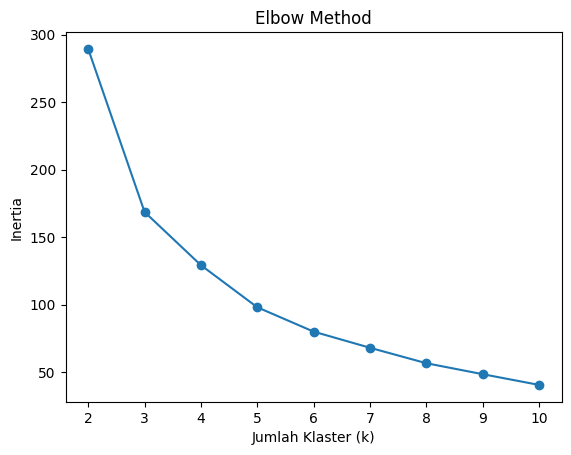

In [36]:
inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

## 2️⃣ Evaluasi Jumlah Klaster (Silhouette Score & Davies-Bouldin Index)

In [40]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    print(f"k={k}, silhouette={sil},  davies_bouldin={db}")


k=2, silhouette=0.3308095353929164,  davies_bouldin=1.086216833353232
k=3, silhouette=0.4297283483705371,  davies_bouldin=0.7857769192203964
k=4, silhouette=0.37040664766803216,  davies_bouldin=0.8889760447920146
k=5, silhouette=0.3718015264204581,  davies_bouldin=0.7978037149568292
k=6, silhouette=0.3631380693997549,  davies_bouldin=0.7789940409244697
k=7, silhouette=0.39170022243152924,  davies_bouldin=0.724193997735797
k=8, silhouette=0.3718106974489955,  davies_bouldin=0.7998870902870568
k=9, silhouette=0.39914481109051725,  davies_bouldin=0.7195295559659425


Berdasarkan evaluasi menggunakan Silhouette Score dan Davies–Bouldin Index, jumlah klaster k = 3 dipilih sebagai konfigurasi optimal.

- Nilai Silhouette Score tertinggi diperoleh pada k = 3, menunjukkan tingkat kohesi dan separasi klaster yang paling baik. 

Meskipun nilai Davies–Bouldin Index terendah diperoleh pada k yang lebih besar, pemilihan k = 3 memberikan keseimbangan terbaik antara kualitas klaster dan interpretabilitas substantif dalam konteks ketimpangan pendidikan

## 3️⃣ Pembangunan Model K-Means `(k = 3)`

In [41]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

## 4️⃣ Penentuan Label Klaster

In [42]:
dfp.columns

Index(['bps_desa_kelurahan', 'rendah_pct', 'menengah_pct', 'tinggi_pct'], dtype='object')

In [43]:
dfp["cluster"] = kmeans.labels_
dfp["cluster"].value_counts()


C:\Users\qwerty\AppData\Local\Temp\ipykernel_948\3530482170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp["cluster"] = kmeans.labels_


cluster
2    93
0    29
1    29
Name: count, dtype: int64

## 5️⃣ Visualisasi Hasil Clustering

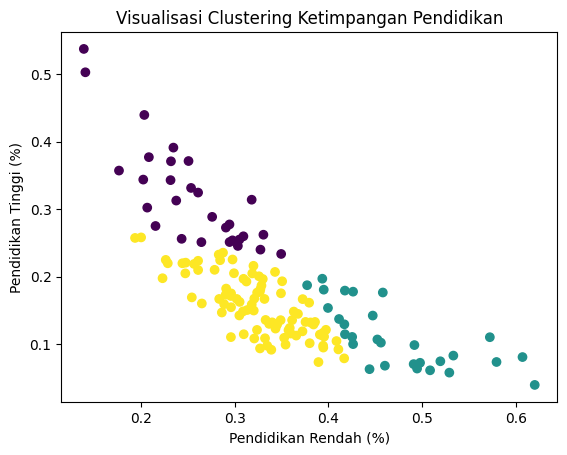

In [44]:
plt.scatter(
    dfp["rendah_pct"],
    dfp["tinggi_pct"],
    c=dfp["cluster"]
)
plt.xlabel("Pendidikan Rendah (%)")
plt.ylabel("Pendidikan Tinggi (%)")
plt.title("Visualisasi Clustering Ketimpangan Pendidikan")
plt.show()


<Figure size 640x480 with 0 Axes>

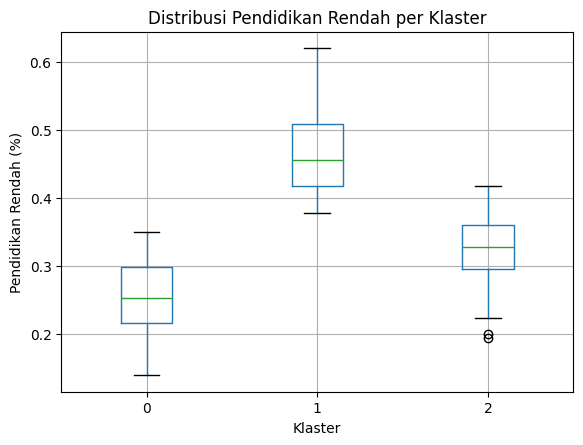

In [55]:
plt.figure()
dfp.boxplot(column="rendah_pct", by="cluster")
plt.xlabel("Klaster")
plt.ylabel("Pendidikan Rendah (%)")
plt.title("Distribusi Pendidikan Rendah per Klaster")
plt.suptitle("")
plt.show()


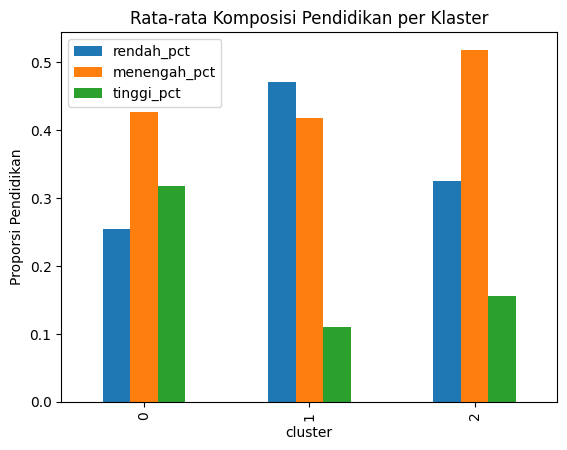

In [54]:
centroid = dfp.groupby("cluster")[["rendah_pct","menengah_pct","tinggi_pct"]].mean()

centroid.plot(kind="bar")
plt.ylabel("Proporsi Pendidikan")
plt.title("Rata-rata Komposisi Pendidikan per Klaster")
plt.show()


## 6️⃣ Interpretasi dan Analisis Karakteristik Klaster

In [45]:
cluster_summary = dfp.groupby("cluster")[
    ["rendah_pct", "menengah_pct", "tinggi_pct"]
].mean()

cluster_summary


,rendah_pct,menengah_pct,tinggi_pct
cluster,,,
0,0.254930,0.426416,0.318654
1,0.471370,0.417930,0.110701
2,0.325157,0.518466,0.156377


🟢 Klaster 0 – Ketimpangan Pendidikan Rendah

- Memiliki proporsi pendidikan tinggi paling besar (±32%)
- Distribusi pendidikan relatif lebih seimbang
- Akses dan capaian pendidikan cenderung lebih baik

➡️ Menunjukkan wilayah dengan ketimpangan pendidikan paling rendah

___

🔴 Klaster 1 – Ketimpangan Pendidikan Tinggi

- Didominasi oleh penduduk dengan pendidikan rendah (±47%)
- Proporsi pendidikan tinggi sangat kecil (±11%)
- Menunjukkan kelurahan dengan akses dan capaian pendidikan tinggi yang masih sangat terbatas

➡️ Merepresentasikan wilayah dengan ketimpangan pendidikan paling tinggi

___

🟡 Klaster 2 – Ketimpangan Pendidikan Menengah

- Proporsi terbesar berada pada pendidikan menengah (±52%)
- Pendidikan rendah dan tinggi masih berada pada tingkat menengah
- Menggambarkan kelurahan yang sedang dalam proses transisi pendidikan

➡️ Ketimpangan masih ada, namun tidak se-ekstrem klaster 1